# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10.0,5.0)
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Importing the train and test datasets

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.sample(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
13564,fffe4300490044003500330036003200,Laureen Heatherly,23,M,UNL9XF5,Village,No Membership,2016-09-08,Yes,CID55912,Without Offers,Smartphone,Fiber_Optic,14:47:14,13,130.77,3134.26,22.0,554.190000,Yes,No,No,Not Applicable,Too many ads,5
22184,fffe43004900440034003800370030003600,Zoraida Huling,16,F,BZ1D1Z6,City,Platinum Membership,2017-08-09,Yes,CID63987,Without Offers,Smartphone,Fiber_Optic,14:31:38,5,84.83,15844.86,28.0,NaN,No,Yes,Yes,Unsolved,Poor Product Quality,3
10002,fffe43004900440036003000320031003900,Claud Godin,56,F,ZR8W153,Town,Gold Membership,2015-09-06,Yes,CID17397,Credit/Debit Card Offers,Both,Mobile_Data,22:20:09,14,589.97,97641.78,8.0,727.620000,Yes,Yes,Yes,No Information Available,Products always in Stock,2
2414,fffe43004900440034003900390037003700,Tara Peele,29,F,MRBWLKA,Town,No Membership,2017-03-05,?,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:25:28,15,235.99,3181.25,6.0,608.820000,No,Yes,No,Not Applicable,No reason specified,4
8681,fffe43004900440031003100370032003300,Albertha Defore,10,M,SW16JNA,City,Gold Membership,2016-11-12,Yes,CID34489,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:14:36,23,58.39,44669.99,29.0,1068.600312,Yes,No,Yes,No Information Available,Too many ads,3


# Pre-Processing the dataset

## Checking for missing columns

In [4]:
train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [5]:
missing_train=train.columns[train.isna().sum()>0]

In [6]:
missing_train

Index(['region_category', 'preferred_offer_types', 'points_in_wallet'], dtype='object')

In [7]:
train[missing_train].isnull().sum()

region_category          5428
preferred_offer_types     288
points_in_wallet         3443
dtype: int64

In [8]:
round(train[missing_train].isnull().sum().sort_values(ascending=False)/len(train),3)

region_category          0.147
points_in_wallet         0.093
preferred_offer_types    0.008
dtype: float64

In [9]:
train.shape

(36992, 25)

## Solving "joined_through_referral" column

In [10]:
train['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [11]:
train['referral_id'][train['joined_through_referral']=='?'].value_counts()

xxxxxxxx       561
CID15792         5
CID23523         4
CID27804         4
CID40797         4
CID43428         4
CID52976         4
CID43132         4
CID48906         4
CID40060         4
CID36035         4
CID53124         4
CID57328         4
CID3401          4
CID28721         4
CID1601          4
CID22312         4
CID56219         4
CID28580         4
CID16200         4
CID31521         3
CID2374          3
CID24632         3
CID63793         3
CID56846         3
CID59221         3
CID10552         3
CID33824         3
CID23337         3
CID23028         3
CID41964         3
CID62015         3
CID45923         3
CID33137         3
CID39741         3
CID15341         3
CID60523         3
CID58334         3
CID41220         3
CID14879         3
CID34811         3
CID37849         3
CID41557         3
CID63748         3
CID3920          3
CID20198         3
CID60121         3
CID40063         3
CID3901          3
CID55551         3
CID60228         3
CID18246         3
CID43535    

## If a person has a referral ID then it is for sure that the person has joined through referral 

In [12]:
train.loc[(train['referral_id']=="xxxxxxxx") & (train['joined_through_referral']=="?"),'joined_through_referral']="No"
train.loc[(train['referral_id']!="xxxxxxxx") & (train['joined_through_referral']=="?"),'joined_through_referral']="Yes"

## Checking  

In [13]:
train['joined_through_referral'].value_counts()

Yes    20592
No     16400
Name: joined_through_referral, dtype: int64

## Dropping Unused columns 

In [14]:
train.drop(['Name','security_no','referral_id','last_visit_time','customer_id'],axis=1,inplace=True)

## Dataset Distribution Analysis 

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   preferred_offer_types         36704 non-null  object 
 7   medium_of_operation           36992 non-null  object 
 8   internet_option               36992 non-null  object 
 9   days_since_last_login         36992 non-null  int64  
 10  avg_time_spent                36992 non-null  float64
 11  avg_transaction_value         36992 non-null  float64
 12  avg_frequency_login_days      36992 non-null  object 
 13  p

## Separating Categorical and Numerical columns 

In [16]:
categorical_train = []
numerical_train = []
for i in train.columns:
    if train[i].dtype=='O':
        categorical_train.append(i)
    else:
        numerical_train.append(i)

In [17]:
categorical_train

['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [18]:
numerical_train

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

## Categorical Distribution Analysis 

In [19]:
for i in categorical_train:
    print("\n",i,"\n","-"*40)
    print(train[i].value_counts())


 gender 
 ----------------------------------------
F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

 region_category 
 ----------------------------------------
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

 membership_category 
 ----------------------------------------
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

 joining_date 
 ----------------------------------------
2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
2017-02-25    48
2017-03-19    48
2017-10-28    48
2015-05-26    47
2016-12-17    47
2015-01-15    47
2015-08-16    47
2016-09-24    47
2016-11-05    47
2016-04-08    47
2015-06-06    47
2016-03-28    47
2015-01-05    47
2015-09-27    47
2016-09-01    47
2016-01-03    47
2017-01-27    46
2015-06-16    46


## Numerical Distribution Analysis 

In [20]:
train.describe(percentiles=[.01,.1,.25,.5,.75,.9,.99])

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
1%,10.000000,-999.000000,-948.781579,1325.127900,113.627063,-1.000000
10%,15.000000,3.000000,32.290000,6198.329000,512.168000,1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
90%,59.000000,20.000000,702.668000,48789.279000,829.004000,5.000000


## Solving the class_variable "churn_risk_score" 

In [21]:
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

## Extracting proper classes only 

In [22]:
train=train[train['churn_risk_score']!=-1]

In [23]:
train['churn_risk_score'].value_counts()

3    10424
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

In [24]:
train.shape

(35829, 20)

## Converting "joining_date" to days_since and dropping dates 

In [25]:
import datetime

In [26]:
train_date=pd.to_datetime(train['joining_date'])
max_date=max(pd.to_datetime(train['joining_date']))

In [27]:
train_days=(max_date-train_date).apply(lambda x: x.days)

In [28]:
train['days_since_join']=train_days

In [29]:
train.drop(['joining_date'],axis=1,inplace=True)

In [30]:
train['days_since_join']

0         136
1         125
2         415
3         428
4         110
5         723
6        1018
7         537
8         382
9         396
10        588
11        718
12       1065
13        389
14        407
15        175
16        704
17        363
18         60
19        697
20        759
21        520
22        343
24        870
25        631
26        782
27        388
28        231
29        719
30        767
31        424
32        521
33        182
34       1035
35        815
36        444
37         32
38        183
39        205
40        447
41        212
42        332
43        742
44        398
45        321
46         52
47        406
48        751
49        798
51         77
52       1069
53        427
54        249
55        160
56        862
57        132
58        289
59        965
60        228
61        495
64        937
65         34
66       1000
67         63
68        338
69        119
70        206
71        395
72        557
73        593
74        269
75    

# Solving "avg_frequency_login_days" column

In [31]:
train['avg_frequency_login_days'].replace({"Error":"-999"},inplace=True)

In [32]:
train['avg_frequency_login_days']=train['avg_frequency_login_days'].astype('float')

train['avg_frequency_login_days']=train['avg_frequency_login_days'].astype('int32')

In [33]:
train.dtypes

age                               int64
gender                           object
region_category                  object
membership_category              object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days          int32
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
days_since_join                   int64
dtype: object

## Filling-in missing values in the dataset

In [34]:
train.isnull().sum()

age                                0
gender                             0
region_category                 5263
membership_category                0
joined_through_referral            0
preferred_offer_types            276
medium_of_operation                0
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3341
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
days_since_join                    0
dtype: int64

In [35]:
train.fillna({'region_category':'Other', 'preferred_offer_types':'Other', 'points_in_wallet':train['points_in_wallet'].mean()}, inplace=True)

## "Null" values are being handled  

In [36]:
train.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
days_since_join                 0
dtype: int64

## Handling "feedback" column 

In [37]:
def feed(val):
    if val in ['Poor Product Quality','Too many ads','Poor Website','Poor Customer Service']:
        return "Negative"
    elif val in ['No reason specified']:
        return "Unknown"
    else:
        return "Positive"

In [38]:
train['feed']=train['feedback'].apply(lambda x:feed(x))

## Handling "internet_option" column 

In [39]:
train['internet_option'].replace({'Wi-Fi':2,'Mobile_Data':1,'Fiber_Optic':3},inplace=True)

## Handling "membership_category" column 

In [40]:
train['membership_category'].replace({'No Membership':0,'Basic Membership':1,'Silver Membership':2,
                                      'Gold Membership':3,'Platinum Membership':4,'Premium Membership':5}
                                     ,inplace=True)

## Handling "medium_of_operation" column 

In [41]:
train['medium_of_operation'].value_counts()

Desktop       13476
Smartphone    13444
?              5230
Both           3679
Name: medium_of_operation, dtype: int64

In [42]:
train['medium_of_operation'].replace({"?":"Other"},inplace=True)

In [43]:
train['medium_of_operation'].value_counts()

Desktop       13476
Smartphone    13444
Other          5230
Both           3679
Name: medium_of_operation, dtype: int64

## Checking - categorical distribution analysis 

In [44]:
cat = []
for i in train.columns:
    if train[i].dtype=='O':
        cat.append(i)

In [45]:
for i in cat:
    print("\n",i,"\n","-"*40)
    print(train[i].value_counts())


 gender 
 ----------------------------------------
F          17892
M          17881
Unknown       56
Name: gender, dtype: int64

 region_category 
 ----------------------------------------
Town       13702
City       12315
Other       5263
Village     4549
Name: region_category, dtype: int64

 joined_through_referral 
 ----------------------------------------
Yes    19928
No     15901
Name: joined_through_referral, dtype: int64

 preferred_offer_types 
 ----------------------------------------
Gift Vouchers/Coupons       11977
Credit/Debit Card Offers    11860
Without Offers              11716
Other                         276
Name: preferred_offer_types, dtype: int64

 medium_of_operation 
 ----------------------------------------
Desktop       13476
Smartphone    13444
Other          5230
Both           3679
Name: medium_of_operation, dtype: int64

 used_special_discount 
 ----------------------------------------
Yes    19718
No     16111
Name: used_special_discount, dtype: int64



## Label Encoding 

In [46]:
from sklearn.preprocessing import LabelEncoder
for i in  train.select_dtypes("object"):
    lb = LabelEncoder()
    train[i]=lb.fit_transform(train[i])

In [47]:
train.sample(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_join,feed
4056,15,0,1,2,1,1,1,2,11,34.91,46847.38,29,686.849231,0,1,0,1,2,4,318,0
33128,49,1,0,0,1,3,2,2,-999,34.53,36345.12,6,869.533974,1,0,0,1,2,5,82,0
531,25,1,1,5,1,0,2,1,7,148.81,27608.13,20,749.190000,1,0,0,1,2,3,659,0
4625,52,1,2,2,0,1,2,3,-999,321.12,80531.68,14,726.390000,0,1,1,0,6,2,1023,1
15268,56,0,3,3,1,0,3,3,20,82.39,35695.37,28,700.660000,0,1,1,2,0,4,660,2


In [48]:
train.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
days_since_join                 0
feed                            0
dtype: int64

## Correlation Analysis 

In [49]:
train.shape

(35829, 21)

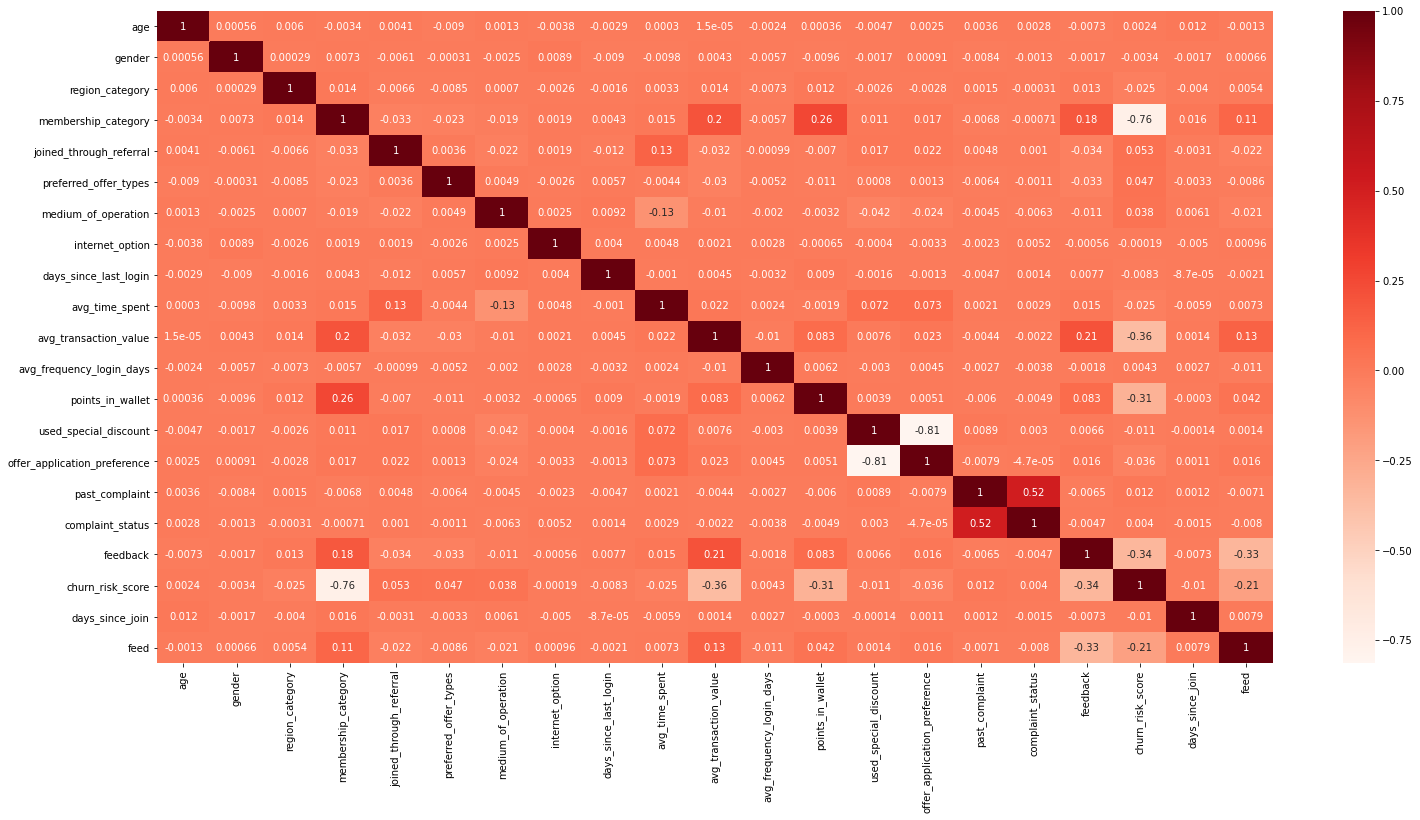

In [50]:
#Using Pearson Correlation
plt.figure(figsize=(25,12))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

##  Removing independent attributes that are highly correlated between themselves

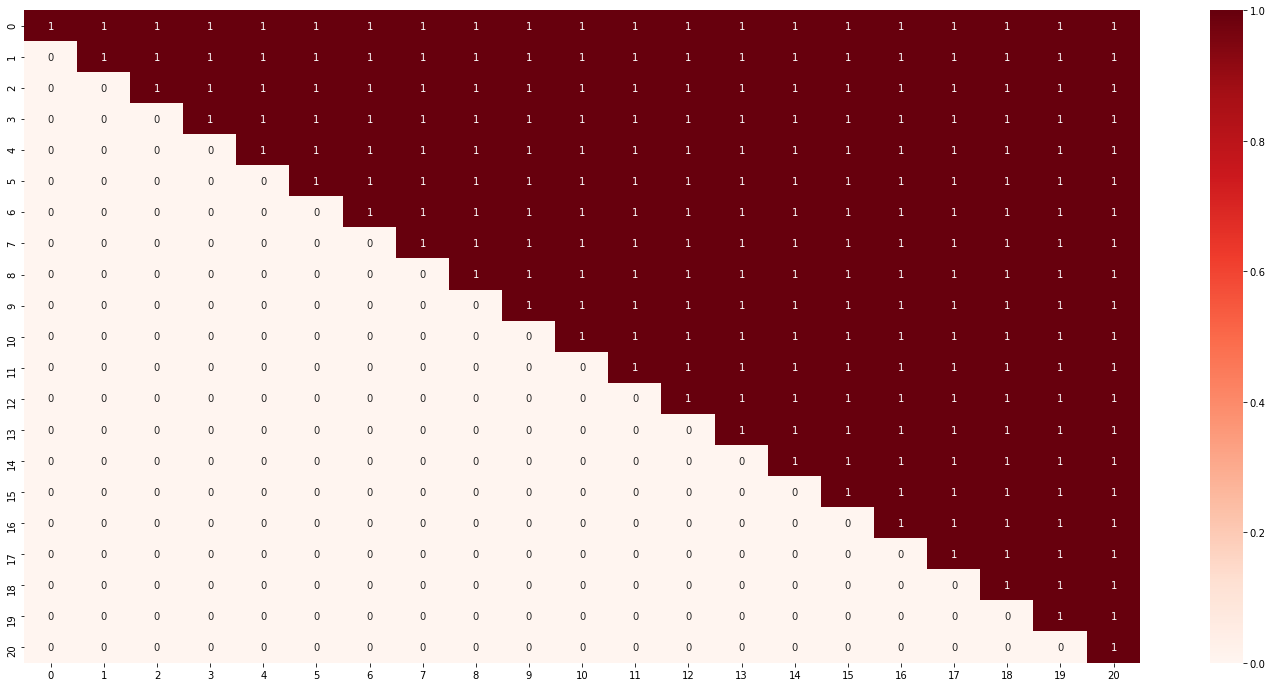

In [51]:
cor_matrix = cor.abs()
to_hide = np.triu(np.ones_like(cor_matrix, dtype = bool))
pd.DataFrame(to_hide)
plt.figure(figsize=(25,12))
sns.heatmap(to_hide, annot=True, cmap=plt.cm.Reds)
plt.show()

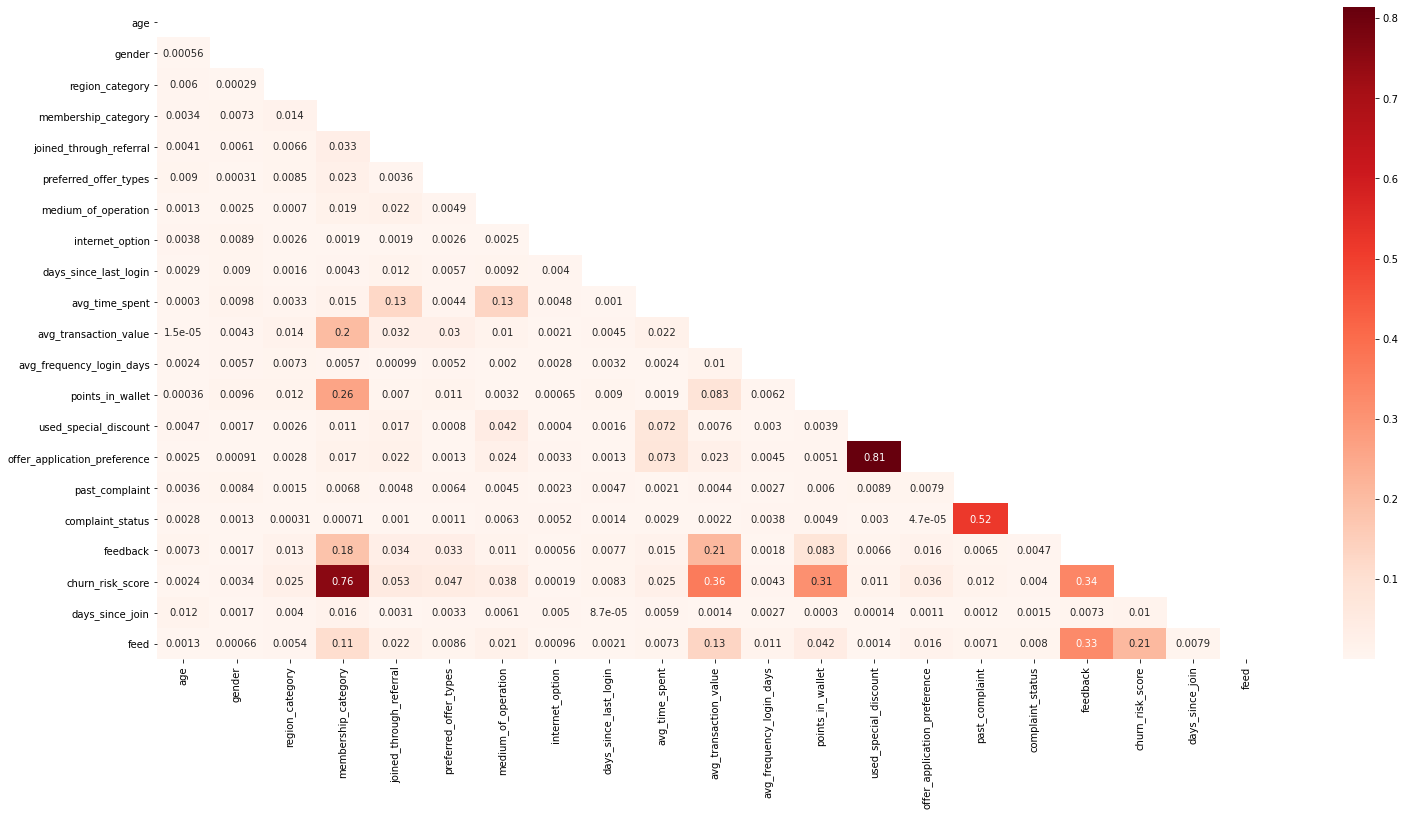

In [52]:
lower_tri = cor_matrix.mask(to_hide)
plt.figure(figsize=(25,12))
sns.heatmap(lower_tri, annot=True, cmap=plt.cm.Reds)
plt.show()

In [53]:
for i in train.columns:
    if any(lower_tri[i] > 0.9):
        train = train.drop(i,axis=1)

In [54]:
train.shape

(35829, 21)

In [55]:
train.sample(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_join,feed
8216,54,1,2,2,1,0,3,3,9,300.81,33771.75,-12,604.85,1,1,1,2,1,4,753,0
25847,43,0,0,2,0,3,0,3,15,227.11,3183.72,24,783.58,0,1,0,1,3,3,911,0
22664,44,0,2,0,0,1,1,1,-999,32.79,9873.20,-999,565.48,1,0,1,0,2,5,935,0
20197,24,1,0,3,0,3,1,3,18,319.57,46138.34,28,699.80,0,1,0,1,7,4,628,0
19558,52,1,0,5,0,1,1,2,9,58.52,27245.31,9,781.22,0,1,0,1,3,3,673,0


## Splitting the independent and dependent attributes from the dataset after pre-processing 

In [56]:
df = train
df.sample(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_join,feed
16687,51,0,0,1,0,1,3,2,16,-843.549457,37307.49,15,1133.444069,1,0,0,1,0,4,64,2
4724,47,1,2,4,1,3,2,3,21,-717.286291,8697.91,14,719.730000,1,0,1,2,3,3,551,0
26348,10,1,0,1,1,0,0,2,15,528.540000,46239.85,16,686.849231,0,1,0,1,3,5,392,0
8928,21,1,2,1,1,1,1,2,17,50.380000,9367.71,27,607.660000,0,1,1,0,1,4,130,0
34443,38,1,0,2,1,0,3,1,13,179.710000,19188.66,9,389.773649,0,1,1,0,7,3,240,0


In [57]:
y_final = df['churn_risk_score']
df.drop('churn_risk_score',axis=1,inplace=True)

In [58]:
df.sample(5)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_join,feed
26028,63,1,2,1,0,1,2,1,13,87.15,44374.24,27,538.250000,0,1,0,1,2,925,0
15144,62,0,1,0,0,1,1,2,13,251.43,2571.88,22,381.057404,0,1,0,1,1,166,0
35236,42,0,2,2,1,0,3,3,14,111.60,8843.79,-999,686.780000,1,0,1,4,1,85,0
23366,48,0,2,3,0,1,0,1,20,444.67,35229.00,18,332.616366,1,0,1,4,6,103,1
11106,46,2,2,2,1,3,1,2,13,64.99,3223.32,-999,354.905291,1,0,0,1,3,123,0


## Dependent attributes 

In [59]:
x_final = df
x_final.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_join,feed
0,18,0,3,4,0,1,2,2,17,300.63,53005.25,17,781.750000,1,1,0,1,4,136,1
1,32,0,0,5,1,1,1,1,16,306.34,12838.38,10,686.849231,1,0,1,2,5,125,1
2,44,0,2,0,1,1,1,2,14,516.16,21027.00,22,500.690000,0,1,1,3,3,415,0
3,37,1,0,0,1,1,1,1,11,53.27,25239.56,6,567.660000,0,1,1,4,3,428,0
4,31,0,0,0,0,0,3,1,20,113.13,24483.66,16,663.060000,0,1,1,2,3,110,0


## Independent attributes 

In [60]:
y_final.head()

0    2
1    1
2    5
3    5
4    5
Name: churn_risk_score, dtype: int64

## Scaling using MinMax Scaler 

In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_final = pd.DataFrame(min_max_scaler.fit_transform(x_final))
x_final.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2737,0.944444,0.5,0.000000,0.2,1.0,1.000000,1.000000,0.0,0.000000,0.493848,0.016468,0.949627,0.485209,0.0,1.0,0.0,0.25,0.375,0.678539,0.0
29927,0.296296,0.5,0.666667,0.2,0.0,0.000000,0.333333,1.0,0.991220,0.654242,0.109383,0.000000,0.487814,0.0,1.0,0.0,0.25,0.125,0.345205,0.0
1129,0.962963,0.5,0.000000,0.4,0.0,0.333333,1.000000,0.0,0.995122,0.485432,0.845220,0.936567,0.377808,0.0,1.0,1.0,0.75,0.750,0.393607,0.5
27759,0.111111,0.0,0.666667,0.0,0.0,1.000000,1.000000,0.0,0.984390,0.476315,0.292944,0.951493,0.504596,1.0,0.0,1.0,0.00,0.375,0.772603,0.0
6190,0.277778,0.5,0.000000,0.6,0.0,1.000000,1.000000,0.5,0.000000,0.483808,0.420452,0.952425,0.490595,1.0,0.0,1.0,0.00,0.125,0.922374,0.0


## Splitting independent and dependent attributes for training and testing 

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.2)
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(28663, 20) (7166, 20) (28663,) (7166,)


# Model Selection for the given dataset

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [74]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=42)

In [75]:
lgbm=LGBMClassifier(random_state=42,n_jobs=-1)

In [76]:
xgb=XGBClassifier(random_state=42,n_jobs=-1,eval_metric='mlogloss')

## Cross Validation_F1_Score 

In [77]:
def make_scorer(estimator,x_train,y_train):
    y_pred=estimator.predict(x_train)
    return f1_score(y_train,y_pred,average="macro")

In [78]:
cross_val_score(rfc,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.7603005669769045

In [79]:
cross_val_score(xgb,x_train,y_train,cv=5,scoring=make_scorer).mean()

C:\Users\ashwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ashwi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7644489946309712

In [80]:
cross_val_score(lgbm,x_train,y_train,cv=5,scoring=make_scorer).mean()

0.7659224703917558

# XGBoost Model for Training and Testing

## GRID Search of XGB

In [81]:
grid_xgb={
    'max_depth':[6,8,10],
    'learning_rate':[0.01,0.03],
    'booster':['gbtree','dart']
}

xgb_g=GridSearchCV(estimator=xgb,
                  param_grid=grid_xgb,
                  cv=5,
                  verbose=2,
                  n_jobs=-1)

In [82]:
xgb_g.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 16.8min finished
C:\Users\ashwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=Non

In [83]:
xgb_g.best_params_

{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 8}

In [97]:
XGB = XGBClassifier(learning_rate=0.01,n_jobs=-1,random_state=42,max_depth=8,booster='gbtree')
XGB.fit(x_train,y_train)

C:\Users\ashwi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
y_predict = XGB.predict(x_test)

C:\Users\ashwi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [99]:
from sklearn.metrics import mean_squared_error,f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,confusion_matrix

xgb = []
xgb.append('XGBoost')
xgb.append(accuracy_score(y_test, y_predict))
xgb.append(f1_score(y_test, y_predict,average='macro'))


print('Mean Squared Error:'+str(mean_squared_error(y_test,y_predict)))
print('Accuracy Score: '+str(xgb[1]))
print('F1 Score: '+str(xgb[2]))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_predict))

Mean Squared Error:0.21015908456600613
Accuracy Score: 0.7902595590287469
F1 Score: 0.7743222991895014
Confusion Matrix: 
[[ 533   41    0    0    0]
 [ 209  338    0    1    0]
 [   0    0 1977  116    0]
 [   0    0  222  983  806]
 [   0    0    0  108 1832]]


# Linear Model 

In [100]:
from sklearn.svm import SVC
svclassifier_linear = SVC(kernel = 'linear')
svclassifier_linear.fit(x_train, y_train.values.ravel())

SVC(kernel='linear')

In [101]:
y_predict_linear = svclassifier_linear.predict(x_test)

In [102]:
from sklearn.metrics import mean_squared_error,f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,confusion_matrix

linear = []
linear.append('Linear')
linear.append(accuracy_score(y_test, y_predict_linear))
linear.append(f1_score(y_test, y_predict_linear,average="macro"))


print('Mean Squared Error:'+str(mean_squared_error(y_test,y_predict_linear)))
print('Accuracy Score: '+str(linear[1]))
print('F1 Score: '+str(linear[2]))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_predict_linear))

Mean Squared Error:0.38291934133407757
Accuracy Score: 0.6447111359196205
F1 Score: 0.6069689442272821
Confusion Matrix: 
[[ 344  185   45    0    0]
 [ 255  244   30   19    0]
 [   0    0 1583  510    0]
 [   0    0  471  783  757]
 [   0    0    2  272 1666]]


# Non - Linear Models

## Polynomial Model

In [103]:
from sklearn.svm import SVC
svclassifier_poly = SVC(kernel = 'poly', degree = 2, gamma = 'auto')
svclassifier_poly.fit(x_train, y_train.values.ravel())

SVC(degree=2, gamma='auto', kernel='poly')

In [104]:
y_predict_poly = svclassifier_poly.predict(x_test)

In [105]:
from sklearn.metrics import mean_squared_error,f1_score,precision_score,recall_score,roc_auc_score,accuracy_score
polynomial = []
polynomial.append('Polynomial')
polynomial.append(accuracy_score(y_test, y_predict_poly))
polynomial.append(f1_score(y_test, y_predict_poly,average="macro"))


print('Mean Squared Error:'+str(mean_squared_error(y_test,y_predict_poly)))
print('Accuracy Score: '+str(polynomial[1]))
print('F1 Score: '+str(polynomial[2]))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_predict_poly))

Mean Squared Error:0.39938598939436226
Accuracy Score: 0.6374546469439017
F1 Score: 0.5924593533938947
Confusion Matrix: 
[[ 335  181   58    0    0]
 [ 244  227   47   30    0]
 [   0    0 1580  513    0]
 [   0    0  472  671  868]
 [   0    0    0  185 1755]]


## Radial Basis Function kernal

In [106]:
from sklearn.svm import SVC
svclassifier_rbf = SVC(kernel = 'rbf', gamma = 'auto')
svclassifier_rbf.fit(x_train, y_train.values.ravel())

SVC(gamma='auto')

In [107]:
y_predict_rbf = svclassifier_rbf.predict(x_test)

In [108]:
from sklearn.metrics import mean_squared_error,f1_score,precision_score,recall_score,roc_auc_score,accuracy_score
radial = []
radial.append('Radial')
radial.append(accuracy_score(y_test, y_predict_rbf))
radial.append(f1_score(y_test, y_predict_rbf,average='macro'))

print('Mean Squared Error: '+str(mean_squared_error(y_test,y_predict_rbf)))
print('Accuracy Score: '+str(radial[1]))
print('F1 Score: '+str(radial[2]))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_predict_rbf))

Mean Squared Error: 0.3635221881105219
Accuracy Score: 0.6507116941110801
F1 Score: 0.6099293666254748
Confusion Matrix: 
[[ 372  182   20    0    0]
 [ 271  246   17   14    0]
 [   0    0 1592  501    0]
 [   0    0  462  665  884]
 [   0    0    0  152 1788]]


# Comparing the performance of the above models

<AxesSubplot:title={'center':'Performance metrics comparision'}, xlabel='Models'>

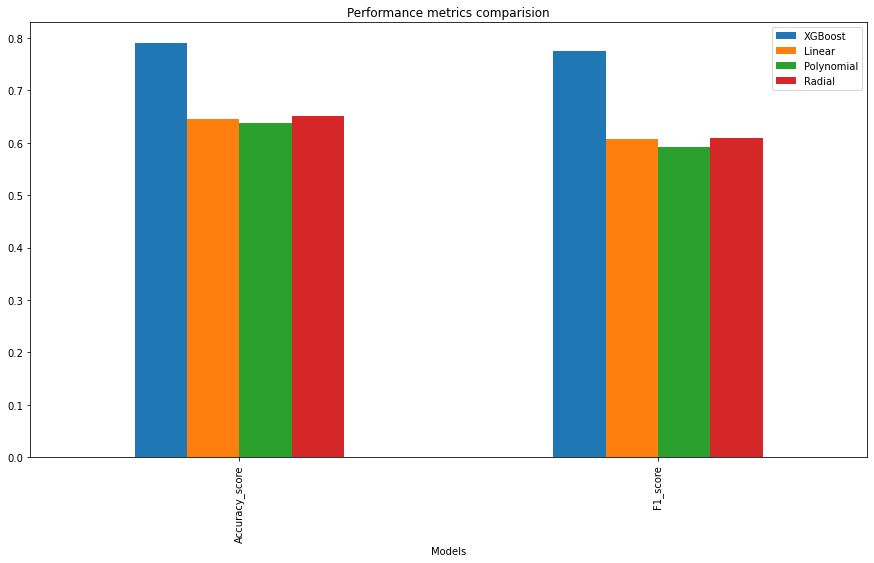

In [109]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd

graph_arr1 = []
graph_arr1 = ['Accuracy_score',xgb[1],linear[1],polynomial[1],radial[1]]

graph_arr2 = []
graph_arr2 = ['F1_score',xgb[2],linear[2],polynomial[2],radial[2]]

# create data
df = pd.DataFrame([graph_arr1 , graph_arr2],columns=['Models','XGBoost', 'Linear','Polynomial','Radial'])

# plot grouped bar chart
df.plot(x='Models',kind='bar',stacked=False,title='Performance metrics comparision',figsize=(15, 8))